In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Explorasi Data

In [ ]:
dataset1 = pd.read_csv('kendaraan_train.csv')
dataset2 = pd.read_csv('kendaraan_test.csv')
dataset = pd.concat([dataset1,dataset2])
dataset.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1.0,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2.0,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3.0,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4.0,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5.0,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0


Persiapan Data

In [ ]:
#Choose Dataset..
clean_data = dataset.drop(['Tertarik','Kode_Daerah','Kanal_Penjualan','Jenis_Kelamin','Sudah_Asuransi','Umur_Kendaraan','Kendaraan_Rusak','SIM','Premi'], axis = 1)
clean_data.head()

,id,Umur,Lama_Berlangganan
0,1.0,30.0,97.0
1,2.0,48.0,158.0
2,3.0,21.0,119.0
3,4.0,58.0,63.0
4,5.0,50.0,194.0


In [ ]:
#Check Empty Data

print("Data yang Kosong : ")
print(clean_data['Umur'].isnull().sum())

print("Jumlah Keseluruhan Data : ")
print(len(clean_data))



print("Persentase Umur yang Kosong : ")
print((clean_data['Umur'].isnull().sum()/len(clean_data['Umur']))*100)
print("Persentase Lama_Berlangganan yang Kosong : ")
print((clean_data['Lama_Berlangganan'].isnull().sum()/len(clean_data['Lama_Berlangganan'])*100))


Data yang Kosong : 
14214
Jumlah Keseluruhan Data : 
333470
Persentase Umur yang Kosong : 
4.262452394518248
Persentase Lama_Berlangganan yang Kosong : 
4.195879689327376


In [ ]:
#Cari rata rata
# (Jumlah seluruh angka dalam tabel/panjang seluruh data)*100
#Handle Missing Value with sum mean()
average_age = clean_data['Umur'].mean() 
clean_data['Umur'] = clean_data['Umur'].fillna(average_age)

average_time = clean_data['Lama_Berlangganan'].mean() 
clean_data['Lama_Berlangganan'] = clean_data['Lama_Berlangganan'].fillna(average_time)

print("Jumlah Data Kosong : ")
print(clean_data.isnull().sum())

Jumlah Data Kosong : 
id                   47639
Umur                     0
Lama_Berlangganan        0
dtype: int64


In [ ]:
#Scaler function
def scalerFunction(data):
    scaler_data = []
    x_min = data.min()
    x_max = data.max()
    for x in data:
        x = x/x_max
        scaler_data.append(x)
    return scaler_data

In [ ]:
#Call Scaller
umur_scaler = scalerFunction(clean_data['Umur'])
lamaberlangganan_scaler = scalerFunction(clean_data['Lama_Berlangganan'])

In [ ]:
#Handle By Pandas
fixed_data = pd.DataFrame({'Umur':umur_scaler,'Lama_Berlangganan':lamaberlangganan_scaler})
fixed_data

,Umur,Lama_Berlangganan
0,0.352941,0.324415
1,0.564706,0.528428
2,0.247059,0.397993
3,0.682353,0.210702
4,0.588235,0.648829
...,...,...
333465,0.717647,0.224080
333466,0.482353,0.775920
333467,0.282353,0.705686
333468,0.694118,0.799331


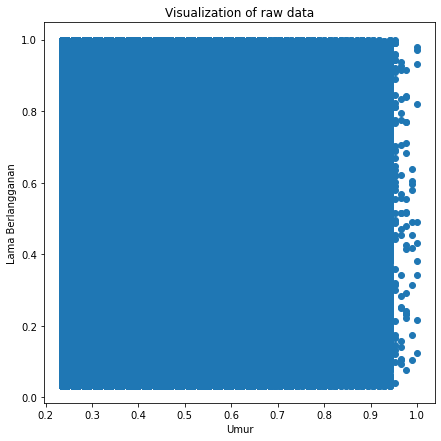

In [ ]:
plt.figure(figsize=(7, 7))
plt.scatter(fixed_data['Umur'],fixed_data['Lama_Berlangganan'])
plt.xlabel('Umur')
plt.ylabel('Lama Berlangganan')
plt.title('Visualization of raw data');

# Modeling

In [ ]:
#Defenite start cluster
def randomCluster(number_of_cluster):
    cluster_rows = np.random.randint(0,len(fixed_data),size=number_of_cluster)
    return cluster_rows

In [ ]:
#Change native cluster_array to numpy cluster_array
def cluster_to_np(get_centroid):
    pcluster = []
    for get in get_centroid:
        pcluster_temp = []
        pcluster_temp.append(fixed_data['Umur'][get])
        pcluster_temp.append(fixed_data['Lama_Berlangganan'][get])
        pcluster.append(pcluster_temp)

    pcluster = np.array(pcluster)
    return pcluster

In [ ]:
#Count Distance function
def distance(x_position,centoroid_x,y_position,centoroid_y):
    dist = np.sqrt(((centoroid_x-x_position)**2)+((centoroid_y-y_position)**2))
    return dist

In [ ]:
#K-Means Function
# def kMeans(fixed datasets,cluster):
def intialCentroid(fixed_data,clusters):
    labels = []
    umur = fixed_data['Umur']
    lama = fixed_data['Lama_Berlangganan']
    for cls in range(len(clusters)):
        labels_temp = []
        centroid_x = clusters[cls][0]
        centroid_y = clusters[cls][1]
        for i in range(len(fixed_data)):
            labels_temp.append(distance(umur[i],centroid_x,lama[i],centroid_y))
        labels.append(labels_temp) 
    return labels

In [ ]:
def setMinimimumDistance(datas,labels):
    cluster_labels = []
    for n in range(len(labels[0])):
        min_position = np.where(datas[n]==datas[n].min())
        cluster_labels.append(min_position[0][0])
    return cluster_labels

In [ ]:
def findNewCluster(number_of_cluster,fixed_data):
    new_cluster = []
    for i in range(number_of_cluster):
        get_avg = []
        #Average every cluster for new cluster
        get_cluster = fixed_data.loc[fixed_data['Cluster']==i]
        get_avg.append(get_cluster['Umur'].mean())
        get_avg.append(get_cluster['Lama_Berlangganan'].mean())
        new_cluster.append(get_avg)

    new_cluster = np.array(new_cluster)
    return new_cluster

== Main Program == 

In [ ]:
def kMeansAlgorithm(total_cluster,max_iteration,fixed_data):
    min_val = []
    for iteration in range(max_iteration): 
        if (iteration==0):
            #Initial starting centroid with random
            get_centroid = randomCluster(total_cluster)
            pcluster = cluster_to_np(get_centroid) 
        else:
            new_cluster = findNewCluster(total_cluster,fixed_data)
            # stop if cluster not changes 
            if ((new_cluster==pcluster).all().any()):
                break
            pcluster = new_cluster
        #Count Distance and initial centoroid
        labels = intialCentroid(fixed_data, pcluster)
        
        #Find Min for variance
        min_val.append(min(labels[0]))
        
        
        #Change labels to pandas Dataframe
        datas = pd.DataFrame(labels)
        #Set minimum distance
        cluster_labels = setMinimimumDistance(datas,labels)
        #Merger labels with dataset
        fixed_data = pd.DataFrame({'Umur':umur_scaler,'Lama_Berlangganan':lamaberlangganan_scaler,'Cluster':cluster_labels})
    
    
    #Count Innertia/Variance for Elbow
    value_temp = 0
    values = 0
    innertia = 0
    avg_innertia = np.mean(min_val)
    for variance_iter in range(len(min_val)):
        value_temp = (min_val[variance_iter]-avg_innertia)**2
        values = values+value_temp
    innertia = value_temp/len(labels[0])
    return fixed_data, pcluster,innertia

In [ ]:
final_data = kMeansAlgorithm(4,123,fixed_data)
pcluster = final_data[1]
innertia = final_data[2]
final_data = final_data[0]

== End Main Program ==

In [ ]:
#Show New Data with Cluster
final_data

,Umur,Lama_Berlangganan,Cluster
0,0.352941,0.324415,2
1,0.564706,0.528428,3
2,0.247059,0.397993,1
3,0.682353,0.210702,3
4,0.588235,0.648829,0
...,...,...,...
333465,0.717647,0.224080,3
333466,0.482353,0.775920,0
333467,0.282353,0.705686,1
333468,0.694118,0.799331,0


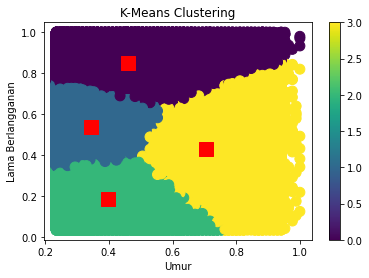

In [ ]:
#visual hasil kluster 
output = plt.scatter(final_data['Umur'], final_data['Lama_Berlangganan'], s = 100, c = final_data['Cluster'], marker = "o", alpha = 1, )
plt.scatter(pcluster[:,0], pcluster[:,1], c='red', s=200, alpha=1 , marker="s");
plt.title("K-Means Clustering")
plt.xlabel('Umur')
plt.ylabel('Lama Berlangganan')
plt.colorbar (output)
plt.show()

In [ ]:
distortions = []
K = range(1,10)
for k in K:
    kmeans = kMeansAlgorithm(k,123,fixed_data)
    innertia_ = kmeans[2]
    distortions.append(innertia_)

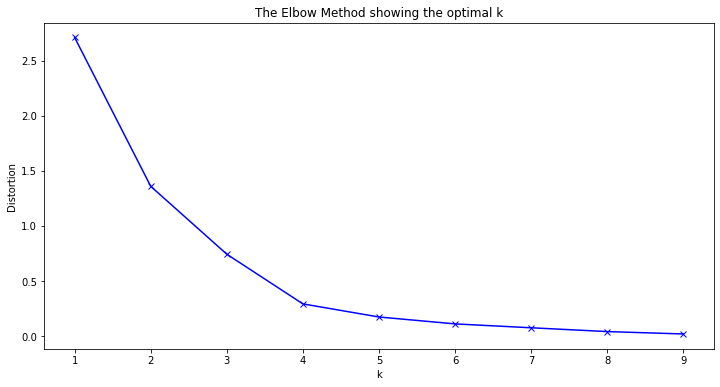

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()